# AMLT

In [171]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
# Accessing dataset
customer=pd.read_csv('Mall_customers.csv')

In [173]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### PREPROCESSING:

In [174]:
# Dropping the columns ‘CustomerID’ .
customer=customer.drop(['CustomerID'],axis=1)
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [175]:
# Checking if there are any null values
customer.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [176]:
# removing all records having null values
customer.dropna(inplace=True)

In [177]:
customer.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [331]:
 # Drop all rows having Family_Size values as 7.0, 8.0 and 9.0

index = customer[customer['Age'].isin([7.0, 8.0, 9.0])].index

In [330]:
# Convereting categorical to numeric
cust=pd.get_dummies(customer)
cust

,Age,Annual Income (k$),Spending Score (1-100),Label,Gender_Female,Gender_Male
0,19,15,39,0,0,1
1,21,15,81,0,0,1
2,20,16,6,1,1,0
3,23,16,77,1,1,0
4,31,17,40,1,1,0
...,...,...,...,...,...,...
195,35,120,79,1,1,0
196,45,126,28,1,1,0
197,32,126,74,0,0,1
198,32,137,18,0,0,1


In [332]:
y=cust['Spending Score (1-100)']

In [333]:
X=cust.drop(['Spending Score (1-100)'],axis=1)

In [181]:
# Standardisation 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  0.88640526, -0.88640526],
       [-0.13276838, -1.54815205, -1.12815215,  1.12815215],
       [-1.20926872, -1.54815205, -1.12815215,  1.12815215],
       [-0.27630176, -1.

In [184]:
# COnverting to DF
X=pd.DataFrame(X, columns=X.columns)
X

,Age,Annual Income (k$),Gender_Female,Gender_Male
0,19,15,0,1
1,21,15,0,1
2,20,16,1,0
3,23,16,1,0
4,31,17,1,0
...,...,...,...,...
195,35,120,1,0
196,45,126,1,0
197,32,126,0,1
198,32,137,0,1


In [185]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

## DIMENSIONALITY REDUCTION

## PCA:

The basic idea of PCA is to find a lower-dimensional representation of a high-dimensional dataset while retaining as much of the original information as possible.

PCA works by identifying the principal components of a dataset, which are the directions in the data that explain the most variance. These principal components are calculated as linear combinations of the original features in the dataset, and they are ordered so that the first principal component explains the most variance, the second explains the second most variance, and so on.

PCA can also be used for data preprocessing, where it can help to reduce the noise and redundancy in the data, making it easier to analyze using other techniques.

### USING EIGEN VALUES

In [186]:
# Construction of covariance marix

In [187]:
cm=np.cov(X_scaled.T)
cm

array([[ 1.00502513, -0.01246034, -0.06117325,  0.06117325],
       [-0.01246034,  1.00502513, -0.05669328,  0.05669328],
       [-0.06117325, -0.05669328,  1.00502513, -1.00502513],
       [ 0.06117325,  0.05669328, -1.00502513,  1.00502513]])

In [188]:
cm.shape

(4, 4)

In [189]:
# Finding eigen value, eigen vector

In [190]:
eig_val,eig_vec=np.linalg.eig(cm)
eig_val

array([2.02354526e+00, 1.01747252e+00, 9.79082722e-01, 3.02169779e-33])

In [191]:
eig_vec

array([[ 8.34441446e-02, -6.97369466e-01, -7.11837694e-01,
        -1.09291655e-18],
       [ 7.71874783e-02,  7.16705992e-01, -6.93090625e-01,
        -1.03120937e-16],
       [-7.02523725e-01, -2.04311275e-03, -8.03507419e-02,
         7.07106781e-01],
       [ 7.02523725e-01,  2.04311275e-03,  8.03507419e-02,
         7.07106781e-01]])

In [192]:
#Sorting eigen values
sorted_eig_val=[i for i in sorted(eig_val, reverse=True)]
sorted_eig_val

[2.0235452557488025,
 1.017472524386665,
 0.979082722377093,
 3.0216977935343485e-33]

In [193]:
# Choosing the dimension =2

tot=sum(sorted_eig_val)
tot

4.020100502512561

In [194]:
exp_var=[(i/tot) for i in sorted_eig_val]
exp_var
# Explained variance

[0.5033568823675149,
 0.25309629044118304,
 0.24354682719130202,
 7.516473261416696e-34]

In [195]:
len(exp_var)

4

In [196]:
cum_exp_var=np.cumsum(exp_var)
cum_exp_var

array([0.50335688, 0.75645317, 1.        , 1.        ])

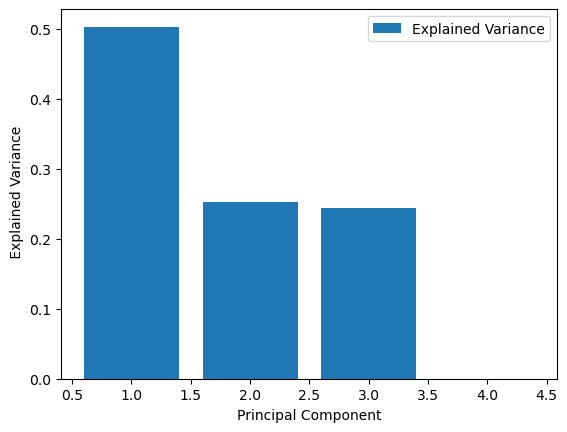

In [197]:
plt.bar(range(1,5), exp_var,label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel(' Explained Variance')
plt.legend();

In [198]:
# range(1,5) is decided by number of values in exp_var, range(1,5) means 4 values 

In [199]:
# Construction of projection matrix
eigen_pair=[(np.abs(eig_val[i]),eig_vec[:,i]) for i in range(len(eig_val))]
eigen_pair

[(2.0235452557488025,
  array([ 0.08344414,  0.07718748, -0.70252372,  0.70252372])),
 (1.017472524386665,
  array([-0.69736947,  0.71670599, -0.00204311,  0.00204311])),
 (0.979082722377093,
  array([-0.71183769, -0.69309062, -0.08035074,  0.08035074])),
 (3.0216977935343485e-33,
  array([-1.09291655e-18, -1.03120937e-16,  7.07106781e-01,  7.07106781e-01]))]

In [200]:
# Taking only 2 dimension

w=np.hstack((eigen_pair[0][1][:,np.newaxis],
            eigen_pair[1][1][:,np.newaxis]))

#### To take 6 dimensions:

w = np.hstack((eigen_pair[0][1][:, np.newaxis],
               eigen_pair[1][1][:, np.newaxis],
               eigen_pair[2][1][:, np.newaxis],
               eigen_pair[3][1][:, np.newaxis],
               eigen_pair[4][1][:, np.newaxis],
               eigen_pair[5][1][:, np.newaxis]))


In [201]:
w

array([[ 0.08344414, -0.69736947],
       [ 0.07718748,  0.71670599],
       [-0.70252372, -0.00204311],
       [ 0.70252372,  0.00204311]])

In [202]:
w.shape

(4, 2)

In [203]:
# here 4 is previous dimension

In [204]:
# Transforming 95 dim data to 2 dim

In [205]:
X_scaled.shape

(200, 4)

In [206]:
w.shape

(4, 2)

In [207]:
new_X=X_scaled.dot(w)
new_X

array([[ 1.33200641, -0.24829048],
       [ 1.34398343, -0.34838628],
       [-1.48960763, -0.27921406],
       [-1.47164209, -0.42935775],
       [-1.42078781, -0.80238468],
       [-1.4746844 , -0.35195359],
       [-1.39388757, -0.97522001],
       [-1.46574969, -0.37464523],
       [ 1.61327417, -2.39102086],
       [-1.42088392, -0.69762426],
       [ 1.6312397 , -2.54116455],
       [-1.39094137, -0.94786375],
       [-1.25025944, -2.07160915],
       [-1.45386878, -0.36998061],
       [ 1.4545306 , -1.01237135],
       [ 1.36470295, -0.26165288],
       [-1.38504896, -0.89315123],
       [ 1.35567214, -0.13420083],
       [ 1.55319686, -1.68102105],
       [-1.37915656, -0.83843872],
       [ 1.45433839, -0.80285052],
       [ 1.39445329, -0.30237154],
       [-1.30739055, -1.33425308],
       [ 1.43333055, -0.57530267],
       [-1.25064386, -1.65256749],
       [ 1.43019214, -0.3931381 ],
       [-1.30454045, -1.2021364 ],
       [ 1.4661232 , -0.69342549],
       [-1.3315368 ,

In [208]:
new_X.shape

(200, 2)

In [209]:
# Visualising the projected data

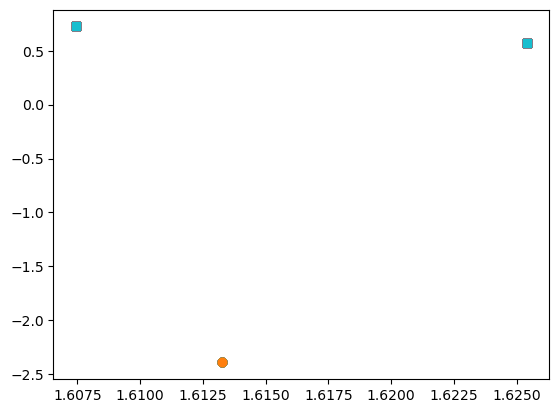

In [210]:
for l in np.unique(y):
    plt.scatter(new_X[y==1,0], new_X[y==1,1],marker='s')
    plt.scatter(new_X[y==2,0], new_X[y==2,1],marker='x')
    plt.scatter(new_X[y==3,0], new_X[y==3,1],marker='o')

In [211]:
# Here y =1,2,3 bcz y in target has 3 values, this visualisation will be applicale in case of classification data, maybe?

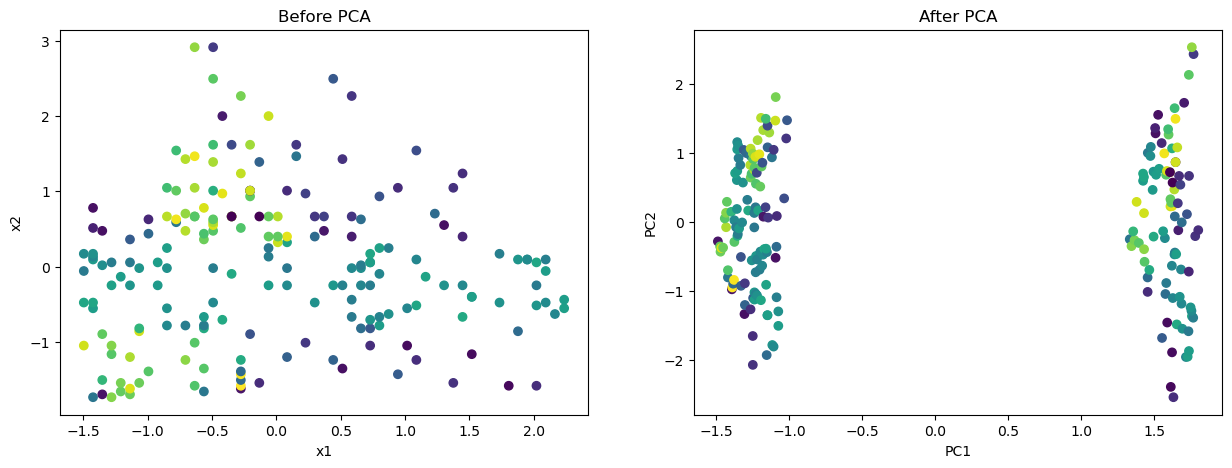

In [212]:
# graphs showing dataset before and after PCA

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(new_X[:,0], new_X[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

### USING SKLEARN

In [213]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_pca=pca.fit_transform(X_scaled)

#  n_components=0.95---> This means that the goal is to capture 95% of the total variance in the data.

In [214]:
pca.components_.T[:,1] # transpose

array([ 0.69736947, -0.71670599,  0.00204311, -0.00204311])

In [215]:
pca.explained_variance_ratio_

array([0.50335688, 0.25309629, 0.24354683])

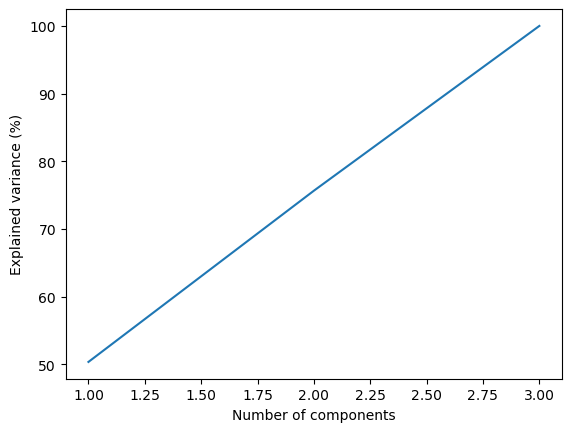

In [216]:
# A visual way to view the cumulative variances is to plot a scree plot where a
# scree plot is a line plot of the principal components.

# plot a scree plot

components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components");
plt.ylabel("Explained variance (%)");

In [217]:
X_pca.shape   # 41 Principal components will be used

(200, 3)

In [218]:
pca.components_

array([[ 0.08344414,  0.07718748, -0.70252372,  0.70252372],
       [ 0.69736947, -0.71670599,  0.00204311, -0.00204311],
       [-0.71183769, -0.69309062, -0.08035074,  0.08035074]])

In [219]:
## EXTRA ########:

from sklearn.decomposition import PCA
components = [1,2,3,4]

for n in components:
    pca = PCA(n_components = n, random_state=43)
    pca.fit(X_scaled)
    pca_df = pca.transform(X_scaled)
    print('Explained Variance Ratio For n_components={} is {}'.format(n,pca.explained_variance_ratio_.sum() * 100))
    
# components =[1,2,3,4] ----- we can change it

Explained Variance Ratio For n_components=1 is 50.33568823675153
Explained Variance Ratio For n_components=2 is 75.6453172808698
Explained Variance Ratio For n_components=3 is 100.0
Explained Variance Ratio For n_components=4 is 100.0


In [220]:
pca = PCA(n_components=4, random_state=43)
pca.fit(X_scaled)
pca_df = pd.DataFrame(pca.transform(X_scaled), columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [221]:
pca_df

,PC1,PC2,PC3,PC4
0,1.332006,0.248290,2.400642,2.220446e-16
1,1.343983,0.348386,2.298469,2.220446e-16
2,-1.489608,0.279214,1.999358,4.440892e-16
3,-1.471642,0.429358,1.846099,4.440892e-16
4,-1.420788,0.802385,1.410955,4.440892e-16
...,...,...,...,...
195,-1.093375,-1.815118,-1.518242,-3.330669e-16
196,-1.015813,-1.478777,-2.187834,-4.440892e-16
197,1.736885,-2.137632,-1.199970,-6.661338e-16
198,1.769294,-2.438550,-1.490974,-6.661338e-16


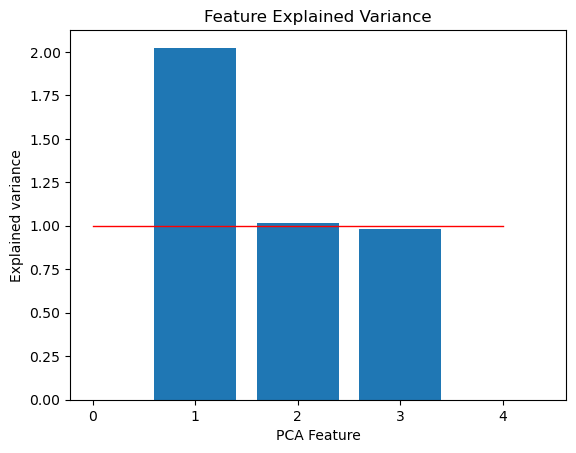

In [222]:
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
    
plt.plot([1]*(len(pca.explained_variance_)+1), 'r', linewidth=1)

plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

NOW WE WILL TAKE 2 COMPONENTS AS THEY ARE THE MINIMUM NUMBER OF PRINCIPAL COMPONENTS THAT EXPALIN THE MAXIMUM AMOUNT OF EXPLAINED VARIANCE

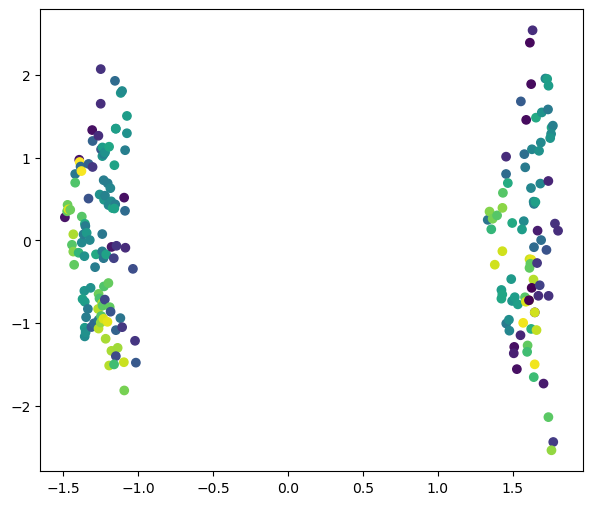

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.fit_transform(X_scaled,y)
plt.figure(figsize=(7,6));
plt.scatter(X_pca[:,0],X_pca[:,1],c=y);

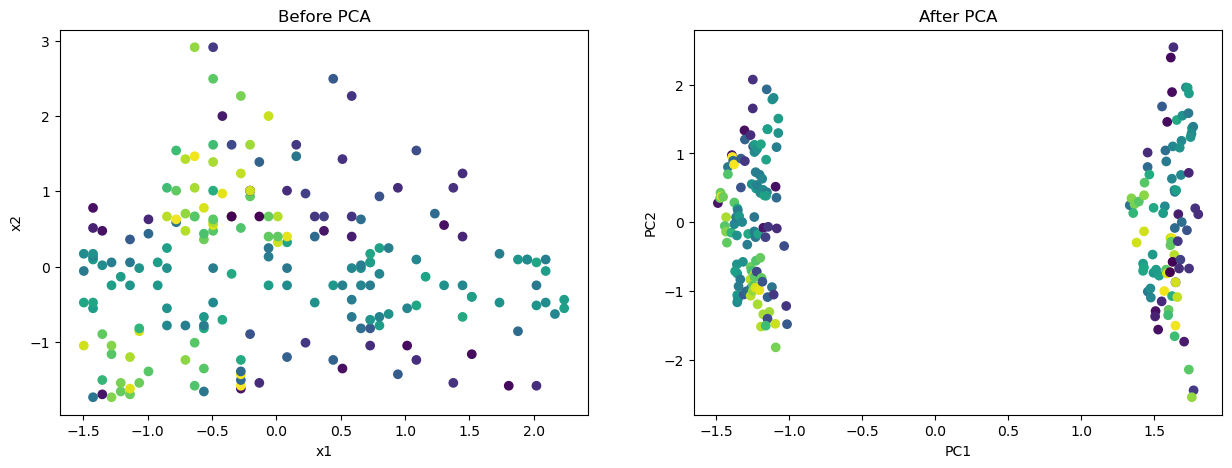

In [224]:
# graphs showing dataset before and after PCA

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

## LDA:

Linear discriminant analysis is a method used to find a linear combination of features that separates classes in a dataset. It is commonly used for dimensionality reduction, as it can project a high-dimensional dataset onto a lower-dimensional space while still preserving the class separability. The resulting transformed data can be used for classification or visualization.

In [225]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [339]:
lda.fit(X_scaled, y)

exp_var_ratios = lda.explained_variance_ratio_

# Print the explained variance ratio for each component
for i, ratio in enumerate(exp_var_ratios):
    print(f"Component {i+1}: {ratio:.2f}")

Component 1: 0.47
Component 2: 0.30


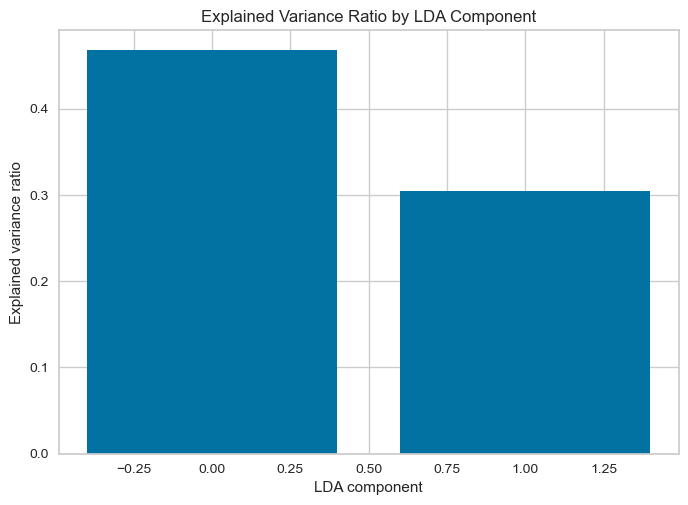

In [340]:
plt.bar(range(len(exp_var_ratios)), exp_var_ratios)
plt.xlabel('LDA component')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio by LDA Component')
plt.show()

In [ ]:
# Choosing n_components=2

In [226]:
lda=LinearDiscriminantAnalysis(n_components=2)

In [227]:
type(lda)

sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [228]:
# Transforming the data

In [229]:
X_lda=lda.fit_transform(X_scaled,y)

In [230]:
X_lda

array([[-1.53244939e+00,  1.65166773e-01],
       [-1.56429945e+00,  6.88256123e-02],
       [-1.71331509e+00,  1.63319954e+00],
       [-1.76109019e+00,  1.48868780e+00],
       [-1.84535870e+00,  1.10203306e+00],
       [-1.70203342e+00,  1.53556828e+00],
       [-1.86592709e+00,  9.08060635e-01],
       [-1.67482672e+00,  1.48610760e+00],
       [-2.07654886e+00, -2.00766975e+00],
       [-1.74317020e+00,  1.14762343e+00],
       [-2.12432395e+00, -2.15218149e+00],
       [-1.82279536e+00,  9.06770532e-01],
       [-2.14593934e+00, -2.02442915e-01],
       [-1.60448828e+00,  1.43535681e+00],
       [-1.60344128e+00, -7.08354185e-01],
       [-1.36456581e+00,  1.42045173e-02],
       [-1.73653189e+00,  9.04190326e-01],
       [-1.28958402e+00,  1.09255575e-01],
       [-1.71292155e+00, -1.43478320e+00],
       [-1.65026842e+00,  9.01610120e-01],
       [-1.39906428e+00, -6.17173437e-01],
       [-1.23981397e+00, -1.35467635e-01],
       [-1.73918030e+00,  3.69153532e-01],
       [-1.

In [231]:
X_lda.shape

(200, 2)

In [232]:
## Visualisation of the data

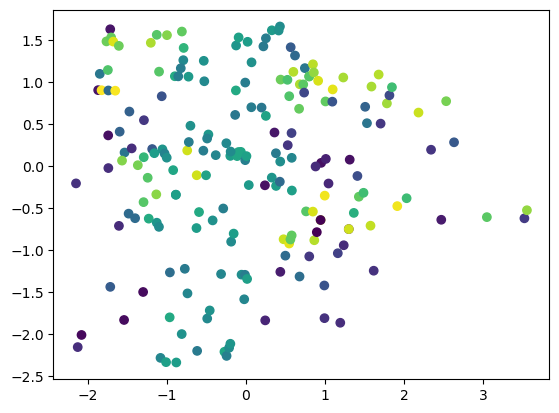

In [233]:
plt.scatter(X_lda[:,0],X_lda[:,1],c=y);

In [234]:
## EXTRA:############

In [235]:
# How many components to achieve % variation of the data?

In [236]:
lda1 = LinearDiscriminantAnalysis(n_components =4)
x_lda1 = lda1.fit_transform(X_scaled,y)
exp_var_lda1 = lda1.explained_variance_ratio_
cum_sum_eigenvalues1 = np.cumsum(exp_var_lda1)
print(cum_sum_eigenvalues1)

[0.4675726  0.77162147 1.        ]


In [237]:
# 2 components will explain 77% variance

## LLE:

In [238]:
from sklearn.manifold import LocallyLinearEmbedding

In [239]:
lle=LocallyLinearEmbedding(n_neighbors=10,random_state=100)

The n_neighbors parameter in LocallyLinearEmbedding controls the number of neighboring points that are considered when constructing the locally linear relationship between data points. In general, the value of n_neighbors should be set high enough to capture the underlying manifold structure of the data but not too high to introduce too much noise or overshoot.

In practice, the choice of n_neighbors depends on the characteristics of the dataset and the desired tradeoff between preserving the global and local structures of the data. A typical rule of thumb is to set n_neighbors to be between 5 and 50, but this range can be expanded or contracted depending on the size and complexity of the dataset.

In the example provided, the n_neighbors value of 10 was chosen based on prior knowledge or experience with the dataset or possibly by experimenting with different values of n_neighbors to see which value provided the best results.

In [240]:
# Transforming the data,

X_lle=lle.fit_transform(X)
X_lle

array([[ 1.53937792e-01, -4.44733572e-02],
       [ 1.49895422e-01, -3.49846023e-02],
       [ 1.49732801e-01, -3.91181338e-02],
       [ 1.43672060e-01, -2.48054177e-02],
       [ 1.24890368e-01,  1.24869803e-02],
       [ 1.43171033e-01, -3.06638075e-02],
       [ 1.14231086e-01,  3.04304608e-02],
       [ 1.38611886e-01, -2.69556010e-02],
       [ 4.80670964e-02,  1.61153439e-01],
       [ 1.21823721e-01,  5.31039732e-03],
       [ 4.17348779e-02,  1.74792907e-01],
       [ 1.11696420e-01,  2.92042032e-02],
       [ 5.87341511e-02,  1.32436622e-01],
       [ 1.31513183e-01, -2.43390240e-02],
       [ 1.05207319e-01,  3.71121807e-02],
       [ 1.35229261e-01, -3.55619570e-02],
       [ 1.06597404e-01,  2.67184785e-02],
       [ 1.36637774e-01, -4.62410147e-02],
       [ 6.40722928e-02,  1.02115184e-01],
       [ 1.01377431e-01,  2.41338675e-02],
       [ 9.89727843e-02,  2.26976203e-02],
       [ 1.19027609e-01, -2.54965912e-02],
       [ 7.26421644e-02,  7.21409138e-02],
       [ 1.

In [241]:
# Visualisation

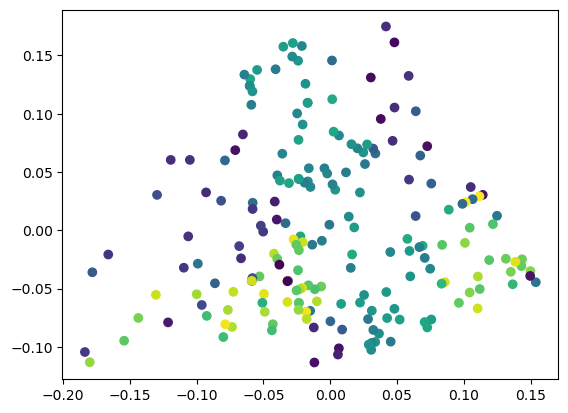

In [242]:
plt.scatter(X_lle[:,0],X_lle[:,1],c=y);

In [351]:
reconstruction_error = lle.reconstruction_error_
print("Reconstruction error:", reconstruction_error)

Reconstruction error: 1.9059345269553769e-06


The reconstruction error of an LLE embedding measures the quality of the lower-dimensional representation of the data. It represents the average squared distance between the original data points and their reconstructed counterparts in the lower-dimensional space.

In the given code snippet, the reconstruction error of the LLE embedding is calculated using the reconstruction_error method and is found to be 9.53616278253001e-07.

Since the reconstruction error is very small (close to zero), it indicates that the LLE embedding is a good representation of the original data. This suggests that the LLE method was successful in preserving the local structure of the data in the lower-dimensional space. However, note that the interpretation of the reconstruction error may depend on the specific application and the scale of the data, and should be considered in conjunction with other evaluation metrics.

## TSNE:

In [244]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)

TSNE is a dimensionality reduction technique that is often used for visualizing high-dimensional data in a lower-dimensional space (usually 2D or 3D) while preserving the structure of the data as much as possible.

The n_components parameter specifies the number of dimensions in the lower-dimensional space, which is set to 2 in this case to allow for easy visualization.

The perplexity parameter controls the balance between preserving local and global structure in the data. It is a hyperparameter that should be set based on the characteristics of the data and the desired outcome. In general, a higher perplexity value will preserve more global structure, while a lower perplexity value will preserve more local structure.

In [245]:
#  The perplexity is a parameter that balances the attention between local and global structure in the data. 
# In this case, the perplexity is set to 30.
# Perplexity is a measure of the effective number of neighbors in the high-dimensional space that are used in the t-SNE algorithm to 
# define the similarity between points. 

In [ ]:
### EXTRA:#####

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


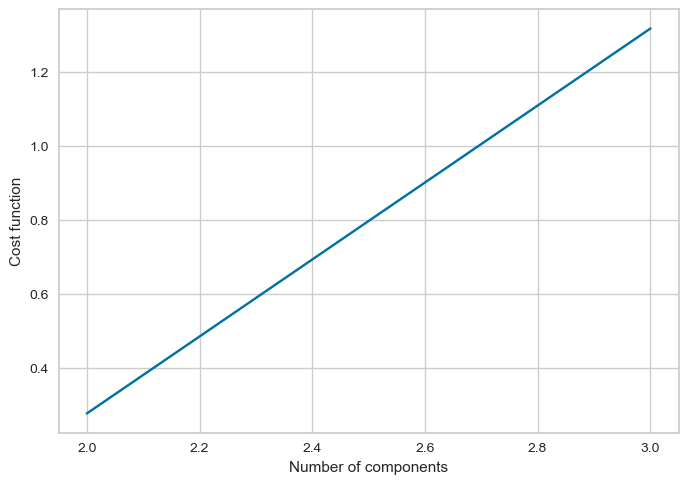

In [353]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# create an array of different n_components values to test
n_components = np.arange(2, 4)

# initialize an empty array to store the cost function values
cost_function = []

# loop over different n_components values
for n in n_components:
    # initialize t-SNE with the current n_components value
    tsne = TSNE(n_components=n, perplexity=30, random_state=100)
    # fit the data and calculate the cost function
    Y = tsne.fit_transform(X)
    cost_function.append(tsne.kl_divergence_)

# plot the cost function values as a function of n_components
plt.plot(n_components, cost_function)
plt.xlabel('Number of components')
plt.ylabel('Cost function')
plt.show()


In [354]:
# The point at which the curve starts to level off can be used as a heuristic for selecting the optimal value of n_components.

In [ ]:
############################3

In [246]:
X_tsne=tsne.fit_transform(X_scaled)
X_tsne.shape

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(200, 2)

In [247]:
X_tsne[0]

array([-21.641388,  17.858694], dtype=float32)

In [248]:
# Visualisation of the transformed points

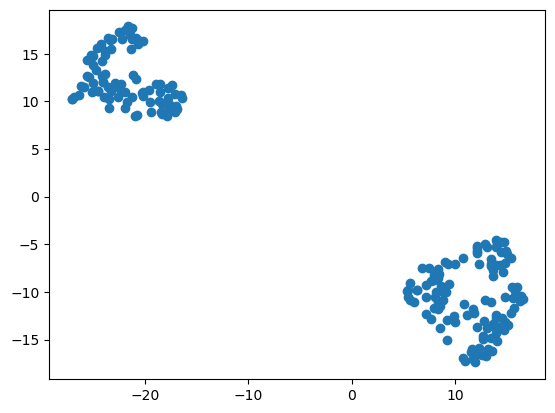

In [249]:
plt.scatter(X_tsne[:,0],X_tsne[:,1]);

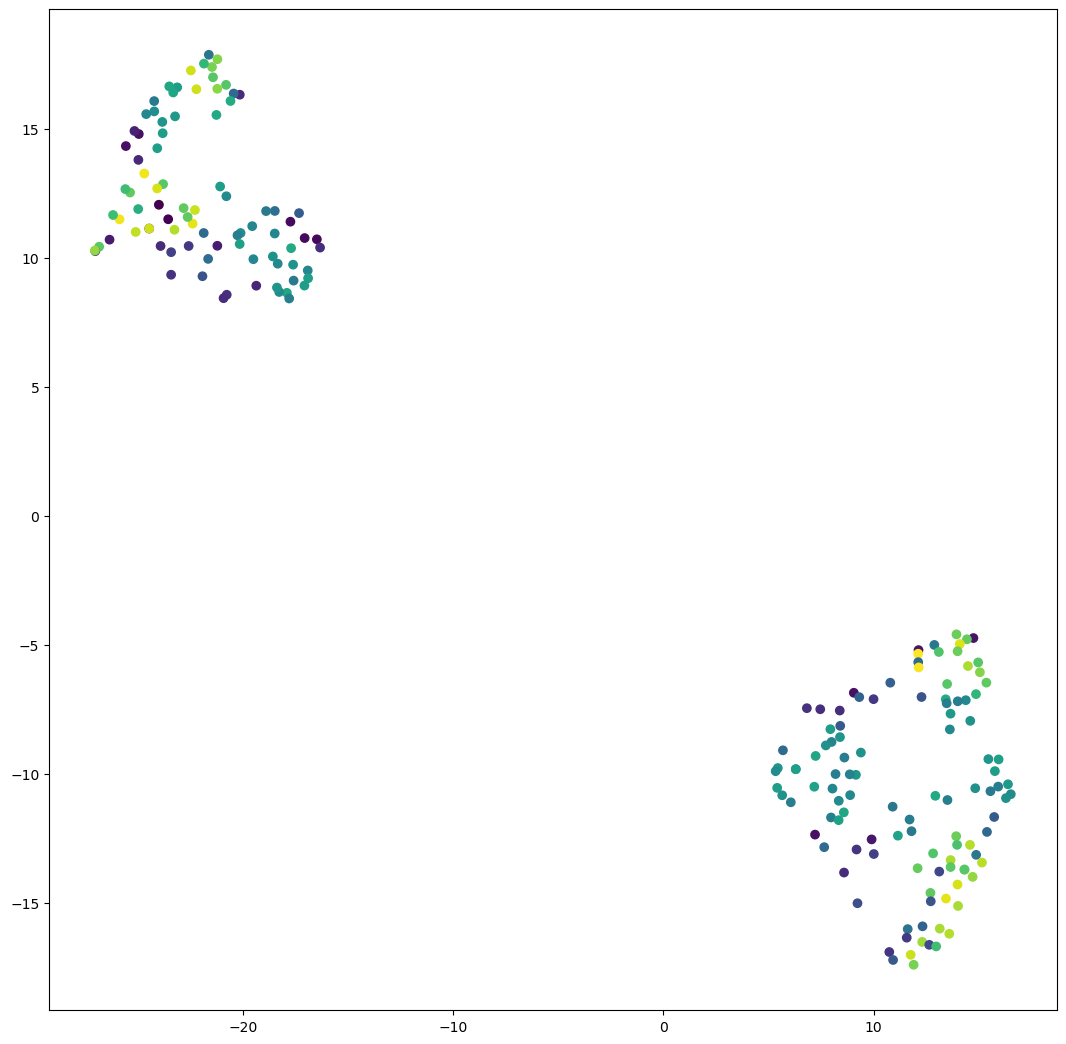

In [250]:
plt.figure(figsize=(13,13))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y);

In [251]:
# Creating a DF for better visualisation

In [252]:
X_df=pd.DataFrame({'X0':X_tsne[:,0],
                  'X1':X_tsne[:,1],
                  'Label':y})
X_df

,X0,X1,Label
0,-21.641388,17.858694,39
1,-21.232893,17.686079,81
2,14.757081,-4.747826,6
3,13.950103,-4.604241,77
4,12.894836,-5.014183,40
...,...,...,...
195,11.910833,-17.410769,79
196,10.931684,-17.224390,28
197,-26.861488,10.420929,74
198,-27.046572,10.247854,18


<Figure size 1500x1200 with 0 Axes>

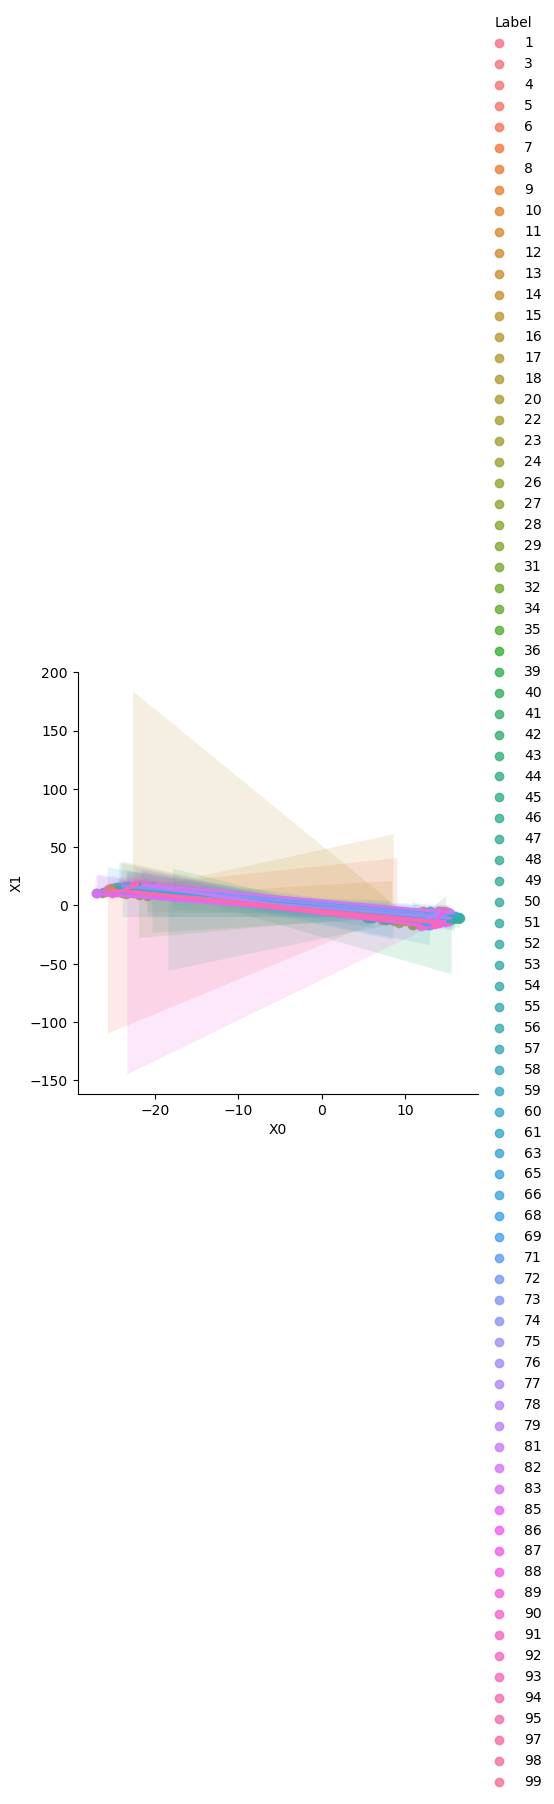

In [253]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',hue='Label');

<Figure size 1500x1200 with 0 Axes>

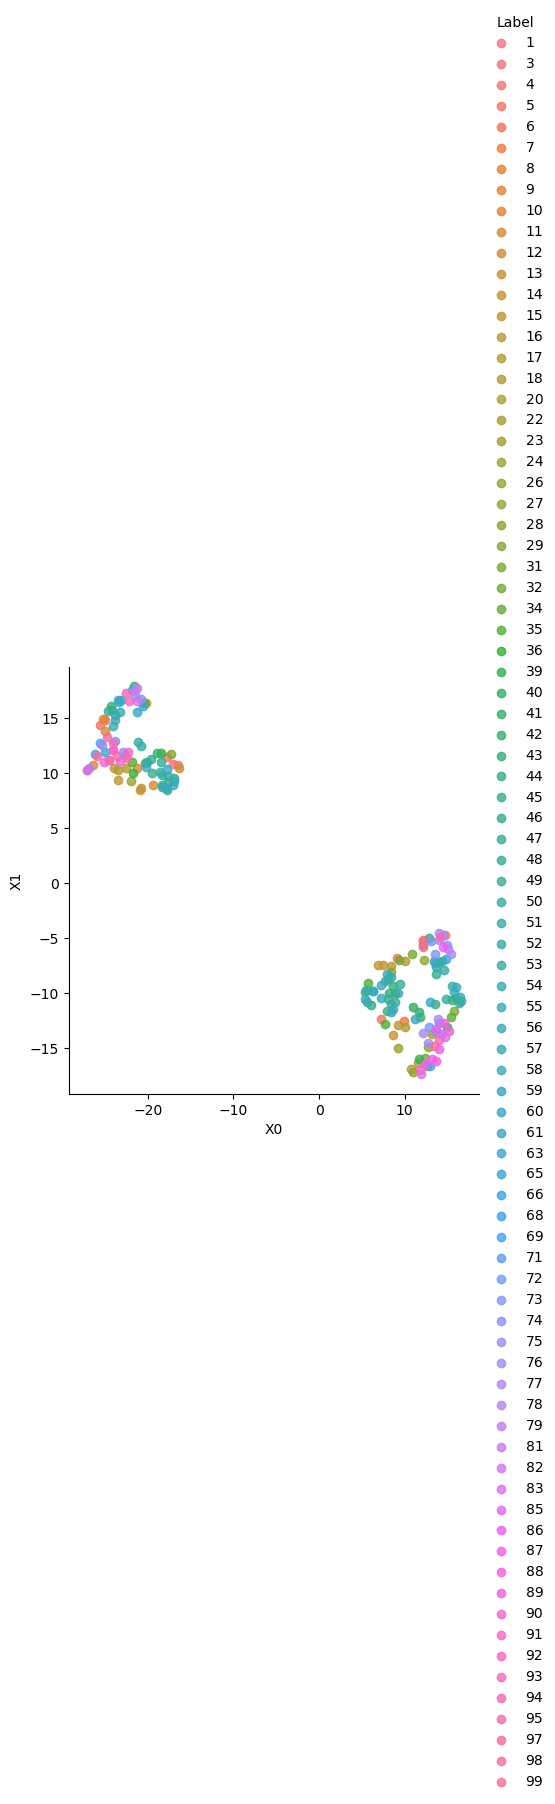

In [254]:
plt.figure(figsize=(15,12))
sns.lmplot(data=X_df,x='X0',y='X1',
           hue='Label',fit_reg=False);

In [255]:
## comparison? insights?

In [256]:
from sklearn.manifold import trustworthiness
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=30)
x_tsne = tsne.fit_transform(X_scaled)

trustworthiness_score = trustworthiness(X_scaled, x_tsne, n_neighbors=2)
print("Trustworthiness score:", trustworthiness_score)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Trustworthiness score: 0.9975826972010178


The trustworthiness score is a measure of how well the high-dimensional relationships between data points are preserved in the lower-dimensional representation. A score of 1 would indicate perfect preservation of relationships, while a score of 0 would indicate no preservation.

In this case, the t-SNE algorithm has produced a trustworthiness score of 0.9982697201017812, which is very close to 1. This indicates that the lower-dimensional representation is preserving the relationships between the data points very well, and suggests that the t-SNE embedding is a good representation of the original data

In [257]:
# comparison

PCA, LDA, t-SNE, and LLE are all dimensionality reduction techniques that can be used for different purposes. Therefore, the choice of technique and the comparison of results will depend on the specific problem being addressed.

PCA and LDA are linear methods and are suitable for data that have a linear structure. PCA is an unsupervised technique that can be used to reduce the dimensionality of data, while LDA is a supervised technique that can be used for feature extraction and classification.

t-SNE and LLE are non-linear methods that are useful when the data has a complex structure that cannot be captured by linear methods. t-SNE is an unsupervised technique that is commonly used for visualizing high-dimensional data, while LLE is also an unsupervised technique that can be used for non-linear dimensionality reduction.

To compare the results of these techniques, we can use different criteria such as visualization, clustering performance, classification performance, computational efficiency, and interpretability. For example, t-SNE is often used for visualization and can provide a more intuitive representation of the data, while PCA and LDA are often used for feature extraction and can provide a more interpretable representation of the data. Clustering and classification performance can also be used to compare the techniques, by evaluating the accuracy or other metrics on a labeled dataset.

Overall, the choice of technique and the comparison of results will depend on the specific problem being addressed and the evaluation criteria chosen.

# CLUSTERING

Clustering is a common technique in machine learning and data analysis that is used to group together similar data points based on their features or attributes.

There are several reasons why we may want to perform clustering:
Data exploration, Data compression, Anomaly detection, Customer segmentation,Recommendation systems

## HIERARCHICAL

Hierarchical clustering is a type of clustering algorithm that is based on a hierarchical decomposition of the data set into nested clusters. In other words, the algorithm groups the data into clusters in a hierarchical manner, starting from the individual data points and gradually merging them into larger clusters.

In [258]:
# COnverting to DF
X=pd.DataFrame(X, columns=X.columns)
X

,Age,Annual Income (k$),Gender_Female,Gender_Male
0,19,15,0,1
1,21,15,0,1
2,20,16,1,0
3,23,16,1,0
4,31,17,1,0
...,...,...,...,...
195,35,120,1,0
196,45,126,1,0
197,32,126,0,1
198,32,137,0,1


In [260]:
# Drawing dendograms:
import scipy.cluster.hierarchy as sch

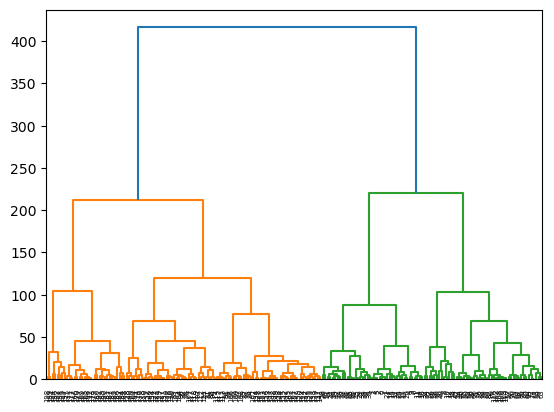

In [261]:
dendro=sch.dendrogram(sch.linkage(X,method='ward'))

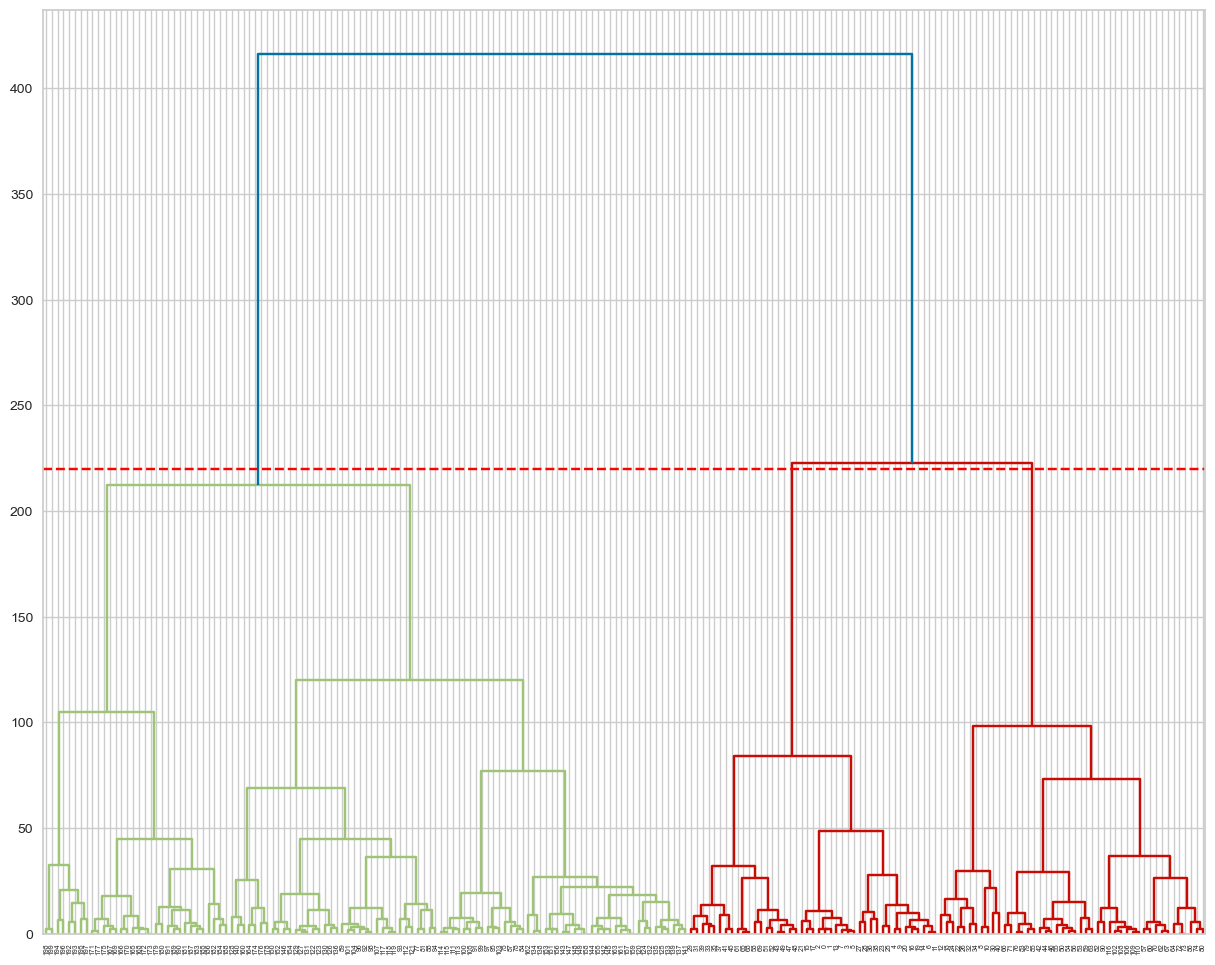

In [359]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=220,color='red',linestyle='--');

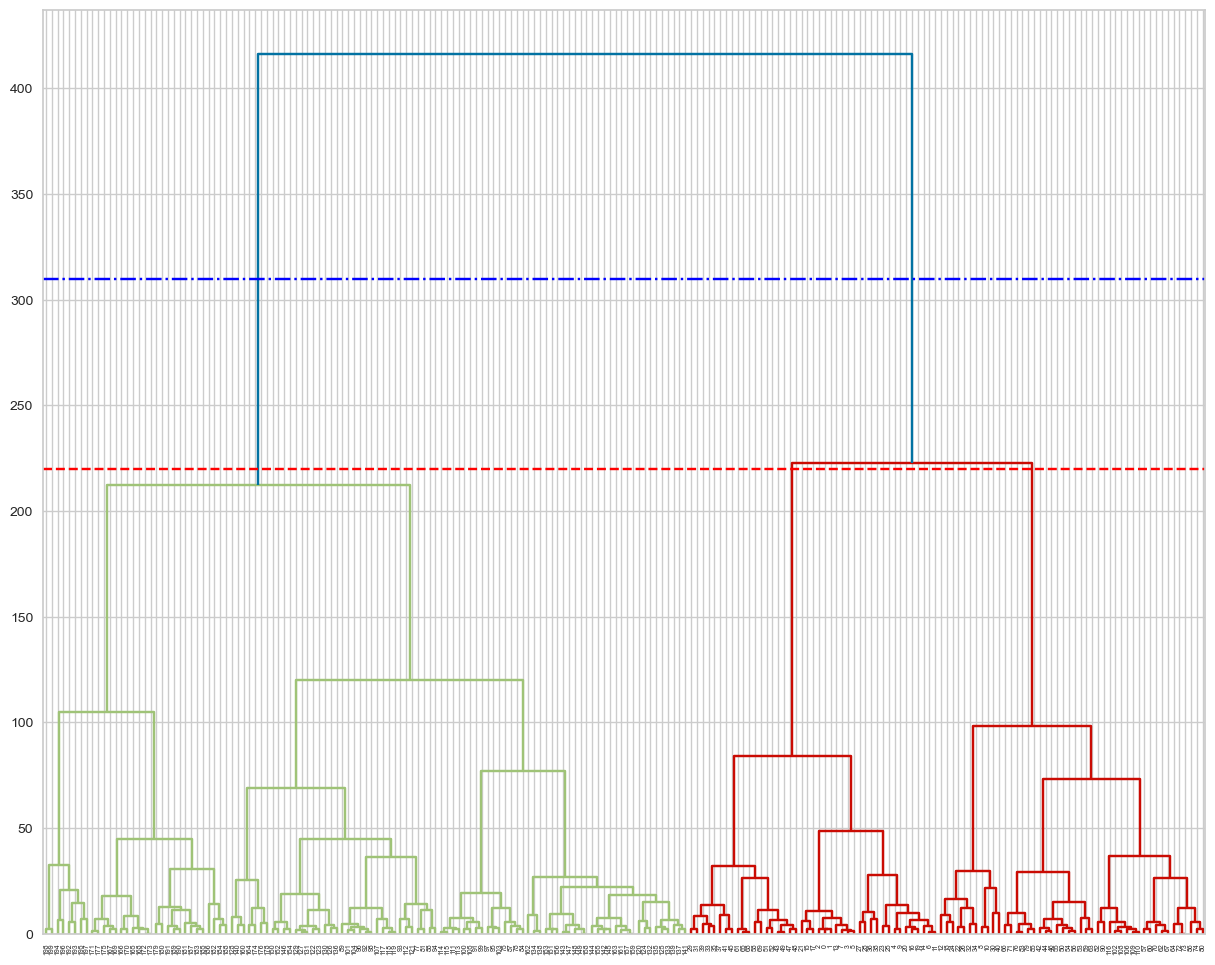

In [358]:
plt.figure(figsize=(15,12))
dendro=sch.dendrogram(sch.linkage(X,method='ward'))
plt.axhline(y=220,color='red',linestyle='--');
plt.axhline(y=310,color='blue',linestyle='-.');

 the number of clusters is determined by examining the dendrogram and identifying the point where the distance between the clusters starts to increase rapidly.
HERE NUMBER = 2

The horizontal lines indicate possible choices for the number of clusters based on the dendrogram. The red line represents a relatively high threshold, suggesting a smaller number of clusters, while the blue line represents a lower threshold, suggesting a larger number of clusters. The specific values of 310 and 220 are arbitrary and may need to be adjusted depending on the data and problem at hand.

In [356]:
## Agglomerative Clustering using Sklearn (PART OF ABOVE CODE ONLY, WILL COME WITH HIERARCHICAL)

In [265]:
from sklearn.cluster import AgglomerativeClustering

clust=AgglomerativeClustering(n_clusters=2,linkage='ward')

'ward': Ward's minimum variance criterion. It minimizes the variance of the clusters being merged.
'complete': It uses the maximum distance between all observations of the two sets.
'average': Uses the average of the distances between each observation of the two sets.
'single': Uses the minimum distance between all observations of the two sets.

In [266]:
type(clust)

sklearn.cluster._agglomerative.AgglomerativeClustering

In [267]:
clust.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [ ]:
# The returns cluster label assignment for the corresponding sample in X.

In [268]:
clust.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## Adding labels to the DF

In [269]:
X['Label']=pd.Series(clust.labels_)

In [270]:
X


,Age,Annual Income (k$),Gender_Female,Gender_Male,Label
0,19,15,0,1,0
1,21,15,0,1,0
2,20,16,1,0,0
3,23,16,1,0,0
4,31,17,1,0,0
...,...,...,...,...,...
195,35,120,1,0,1
196,45,126,1,0,1
197,32,126,0,1,1
198,32,137,0,1,1


In [361]:
# 2 clusters formed as labels

## Analysing the customer segments

In [271]:
# No of customers in each segment

X['Label'].value_counts()

1    111
0     89
Name: Label, dtype: int64

In [272]:
# Listing all custmers belong to the segment '0'
X[X['Label']==0]

,Age,Annual Income (k$),Gender_Female,Gender_Male,Label
0,19,15,0,1,0
1,21,15,0,1,0
2,20,16,1,0,0
3,23,16,1,0,0
4,31,17,1,0,0
...,...,...,...,...,...
106,66,63,1,0,0
108,68,63,0,1,0
109,66,63,0,1,0
110,65,63,0,1,0


In [273]:
X[X['Label']==1]

,Age,Annual Income (k$),Gender_Female,Gender_Male,Label
75,26,54,0,1,1
77,40,54,0,1,1
78,23,54,1,0,1
81,38,54,0,1,1
84,21,54,1,0,1
...,...,...,...,...,...
195,35,120,1,0,1
196,45,126,1,0,1
197,32,126,0,1,1
198,32,137,0,1,1


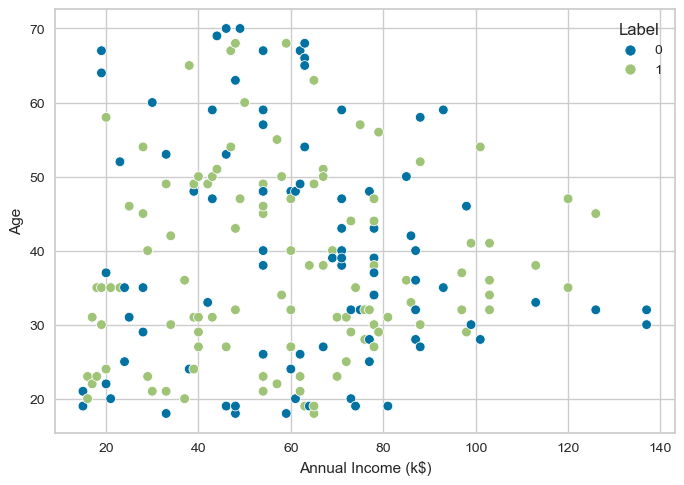

In [371]:
# Buying pattern of Milk and Grocery

sns.scatterplot(x=X['Annual Income (k$)'],y=X['Age'],hue=X['Label']);

<Figure size 1500x1200 with 0 Axes>

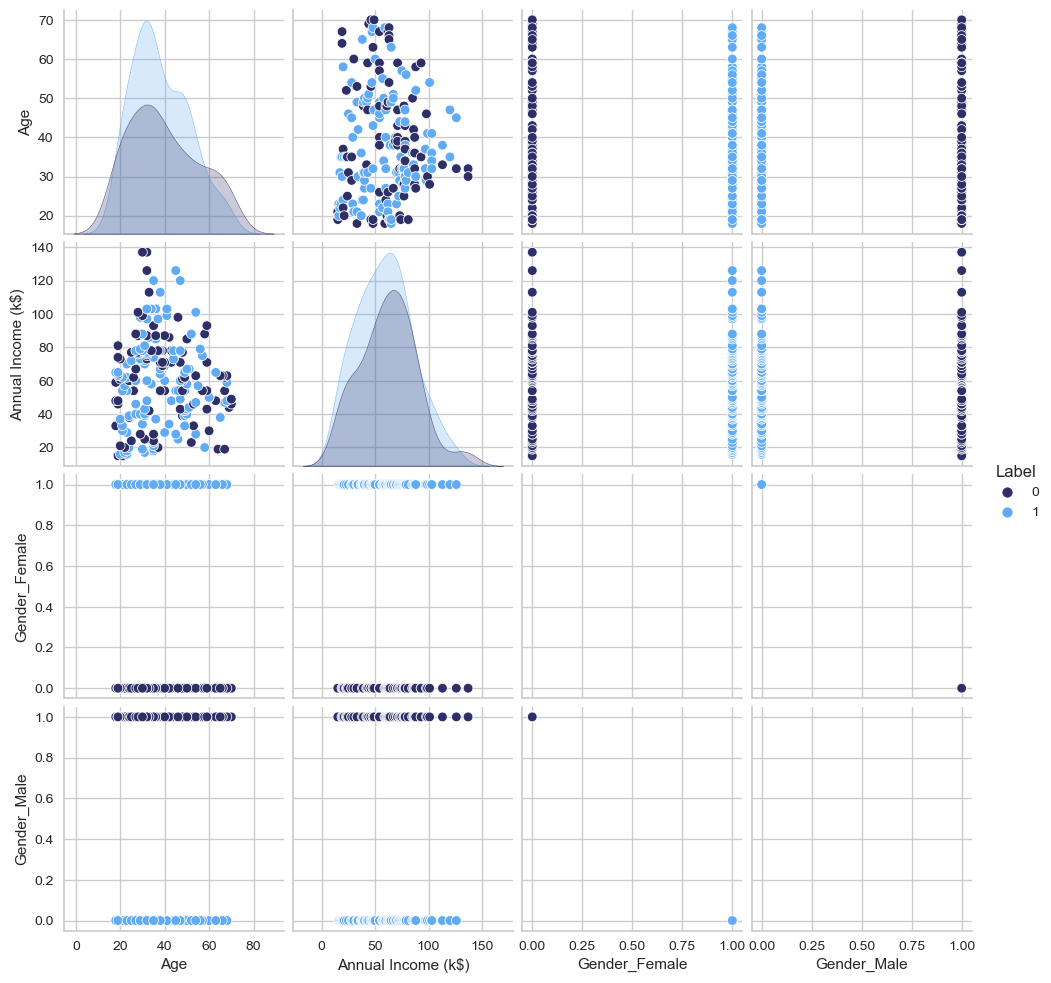

In [369]:
plt.figure(figsize=(15,12))
sns.pairplot(data=X,hue='Label',palette=(["#2f2f68", "#60abf3"]));

In [362]:
## make more graphs?


In [ ]:
plt.figure(figsize=(16,5))
plt.title('Customers income by cluster')
ax = sns.boxplot(data=data2, x='Cluster', y='Income', palette='coolwarm', showfliers=False)
plt.show()

In [ ]:
sns.countplot(data=data,x='clusters',palette=cluster_color)

In [372]:
## EXTRA: GRAPHS OF CLUSTERS


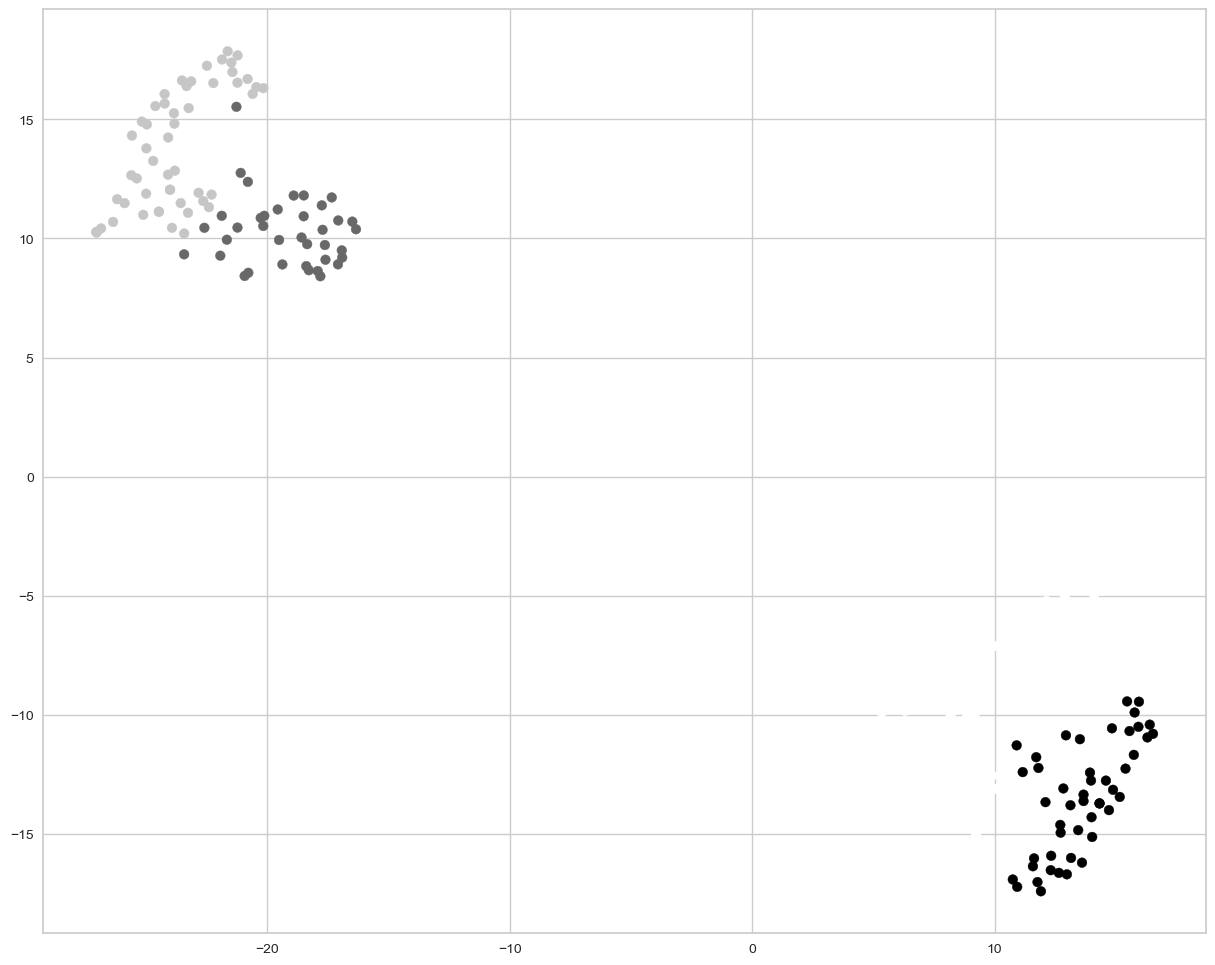

In [381]:
from sklearn.cluster import AgglomerativeClustering
clust = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')

clust.fit_predict(X_scaled)

#Transposing the results over TSNE
plt.figure(figsize=(15,12));
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=clust.labels_)

In [385]:
def agclust(n_clusters,linkage):
  c = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkage)
  c.fit_predict(X_scaled)
  plt.scatter(x_tsne[:,0],x_tsne[:,1],c=c.labels_)

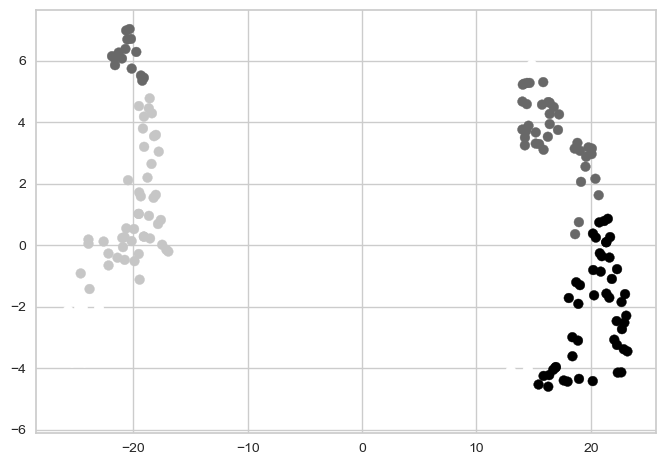

In [386]:
agclust(4,'complete')

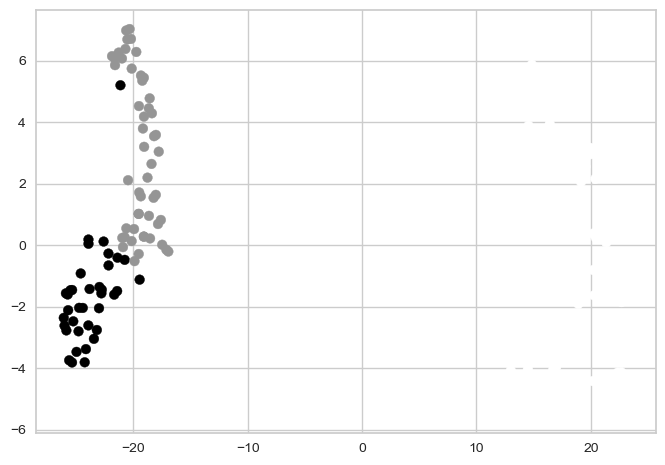

In [387]:
agclust(3,'ward')

## GMM

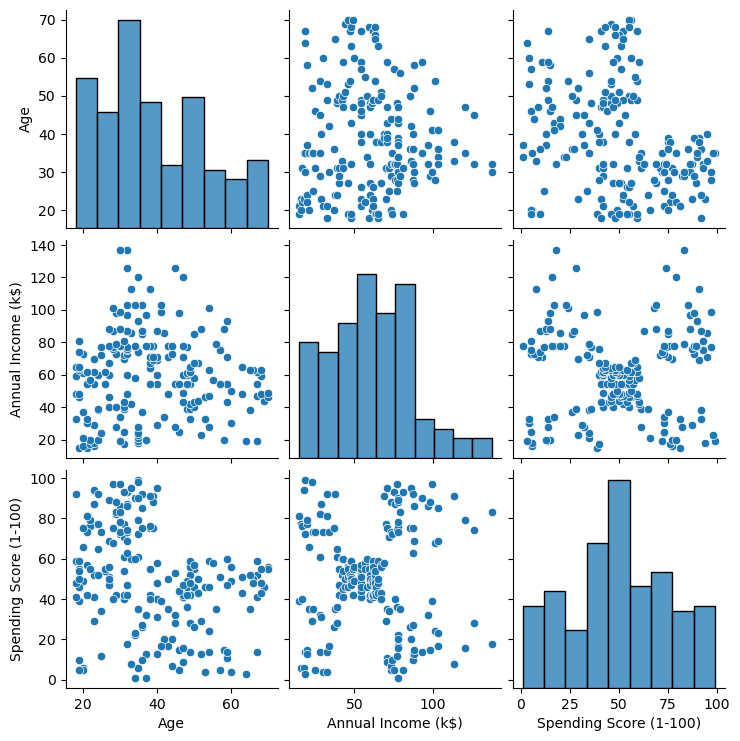

In [281]:
sns.pairplot(customer);

In [ ]:
# start

### Finding no of clusters

In [286]:
n_components=np.arange(1,11)
aic_scores=[]
bic_scores=[]
for n in n_components:
    model=GaussianMixture(n,n_init=10)
    model.fit(X_scaled)
    aic_score=model.aic(X_scaled)
    bic_score=model.bic(X_scaled)
    aic_scores.append(aic_score)
    bic_scores.append(bic_score)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

 evaluates the models using the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC).

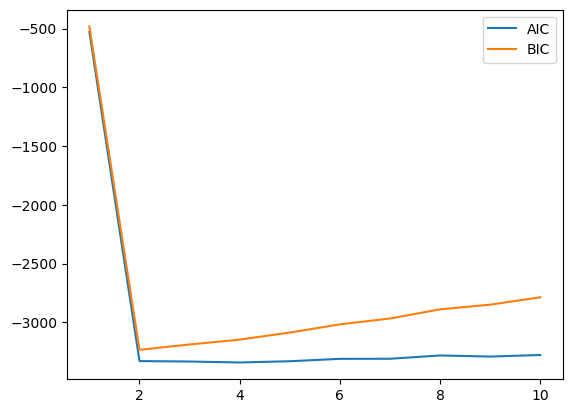

In [287]:
plt.plot(n_components,aic_scores,label='AIC')
plt.plot(n_components,bic_scores,label='BIC')
plt.legend();

In [288]:
#### No of clusters=2

In [291]:
# Model building

gmm_data=GaussianMixture(n_components=2,n_init=10)
gmm_data.fit(X_scaled)

GaussianMixture(n_components=2, n_init=10)

In [292]:
data_pred=gmm_data.predict(X_scaled)
data_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [293]:
gmm_data.means_

array([[ 0.06866767,  0.06363885, -1.12815215,  1.12815215],
       [-0.05395317, -0.05000195,  0.88640526, -0.88640526]])

In [294]:
gmm_data.covariances_

array([[[ 1.22567626e+00, -1.04066272e-01,  0.00000000e+00,
          0.00000000e+00],
        [-1.04066272e-01,  1.02207728e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e-06,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-06]],

       [[ 8.16068940e-01,  5.34957132e-02, -7.04340094e-33,
          0.00000000e+00],
        [ 5.34957132e-02,  9.76973092e-01, -2.81736038e-32,
          0.00000000e+00],
        [-7.04340094e-33, -2.81736038e-32,  1.00000000e-06,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-06]]])

In [295]:
gmm_data.weights_

array([0.44, 0.56])

In [296]:
## Adding Cluster labels to DF

In [299]:
customer['Label']=data_pred

In [300]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


In [302]:
customer['Label'].value_counts()

1    112
0     88
Name: Label, dtype: int64

In [ ]:
# Visuaise the clusters

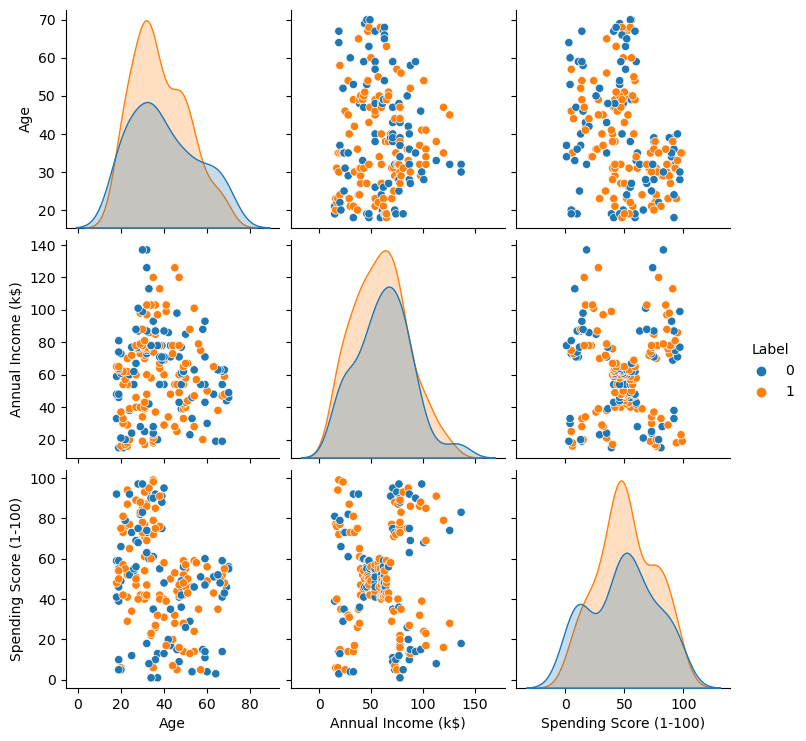

In [304]:
sns.pairplot(customer, hue='Label');

In [388]:
## EXTRA:

def gmm(n_components,n_init,max_iter,init_params):
  gmm_data = GaussianMixture(n_components=n_components,n_init=n_init,max_iter=max_iter,init_params=init_params)
  gmm_data.fit(xs)
  data_pred=gmm_data.predict(xs)
  plt.scatter(x_tsne[:,0],x_tsne[:,1],c=data_pred)

NameError: name 'data' is not defined

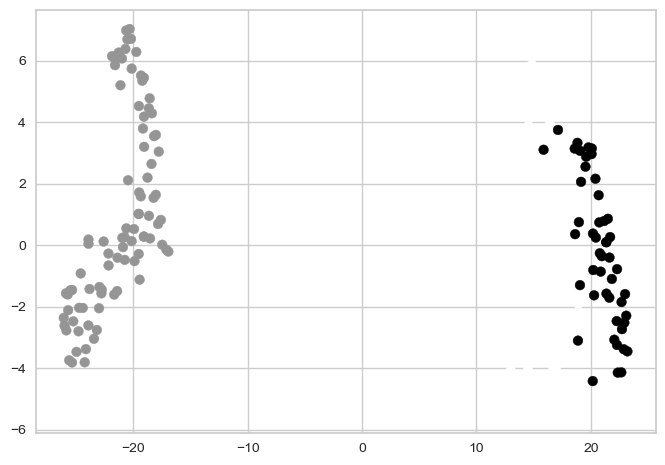

In [391]:
gmm_data = GaussianMixture(n_components=3,n_init=10,max_iter=100,init_params='kmeans')
gmm_data.fit(X_scaled)
data_pred=gmm_data.predict(X_scaled)
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=data_pred)
data['Class'] = data_pred
data.head()
data.drop(['Unnamed: 0'],axis=1, inplace=True)

## ANALYSE CLUSTERSSSSSSSSSSSSS

In [396]:
customer['clusters']=km.labels_

In [397]:
customer.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label,clusters
0,Male,19,15,39,0,4
1,Male,21,15,81,0,4
2,Female,20,16,6,1,1
3,Female,23,16,77,1,1
4,Female,31,17,40,1,1


In [ ]:
sns.countplot(data=data,x='clusters',palette=cluster_color)

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='TotalMoneySpent',y=data.index,data=data,hue='clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.ylabel('Frequency')
plt.title("Clustering on Total Expenditure")

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Income',y=data.index,data=data,hue='clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
plt.ylabel('Frequency')
plt.title("Clustering on Income")

In [ ]:
plt.figure(figsize=(8,8))
sns.displot(data=data,x='Age',hue='clusters',kind='kde')
plt.title("Clustering based on Age")

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Education',hue='clusters',palette=cluster_color)
plt.legend(bbox_to_anchor=(1.01, 1),frameon=False)
plt.title("Clustering based on Education")

## DO CLUSTER PROFILING

In [ ]:
# ????

In [305]:
# K Means Clustering

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


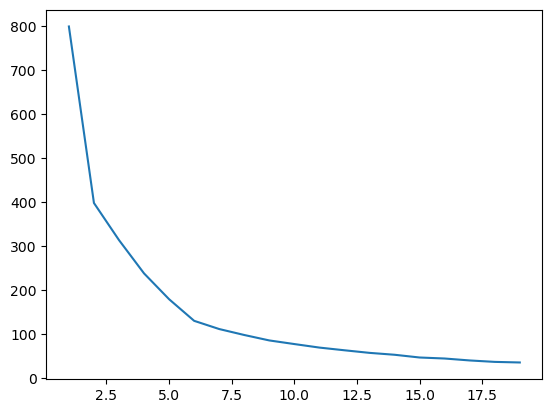

In [306]:
from sklearn.cluster import KMeans

ssd = []

for k in range(1,20):
  kmeans = KMeans(n_clusters=k, random_state=10)
  kmeans.fit(X_scaled)
  ssd.append(kmeans.inertia_)
plt.plot(range(1,20),ssd);

In [308]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X_pca) for k in range(2, 10)]


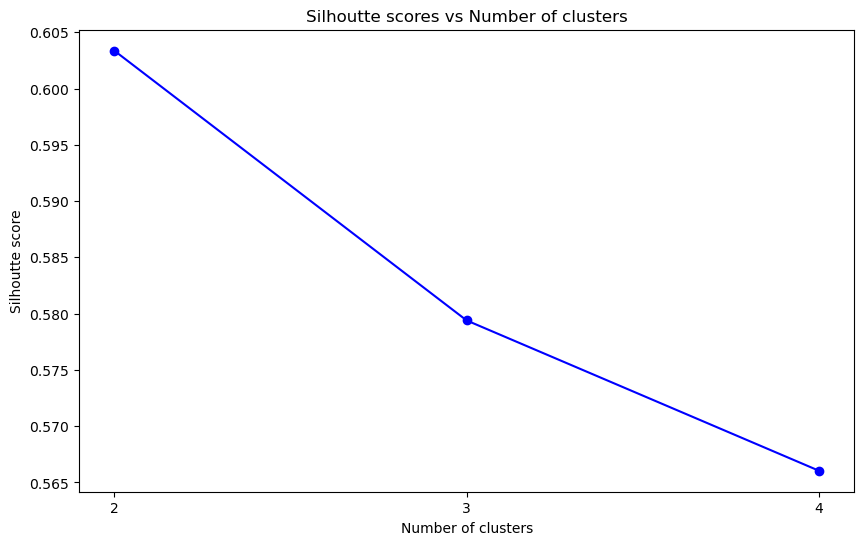

In [309]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(10,6))
silhoutte_scores = [silhouette_score(X_pca, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [398]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=23)
kmeans.fit(X_pca)

print('Silhoutte score of our model is ' + str(silhouette_score(X_pca, kmeans.labels_)))

Silhoutte score of our model is 0.3695773065023482


In [310]:
from yellowbrick.cluster import KElbowVisualizer

Elbow value= 6


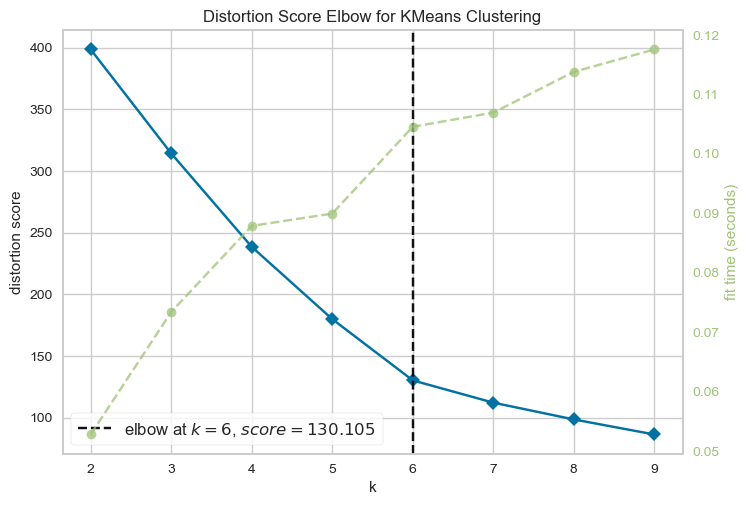

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [325]:
fig_elb = KElbowVisualizer(KMeans(random_state=42, n_init=10, max_iter=10000), k=(2,10))
fig_elb.fit(X_scaled)
print(f'Elbow value= {fig_elb.elbow_value_}')
fig_elb.show()

In [323]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,10) 
for _ in K:
    km = KMeans(n_clusters = _, n_init=10, random_state=42, max_iter=1000)
    y = km.fit_predict(pca_df)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled,y))

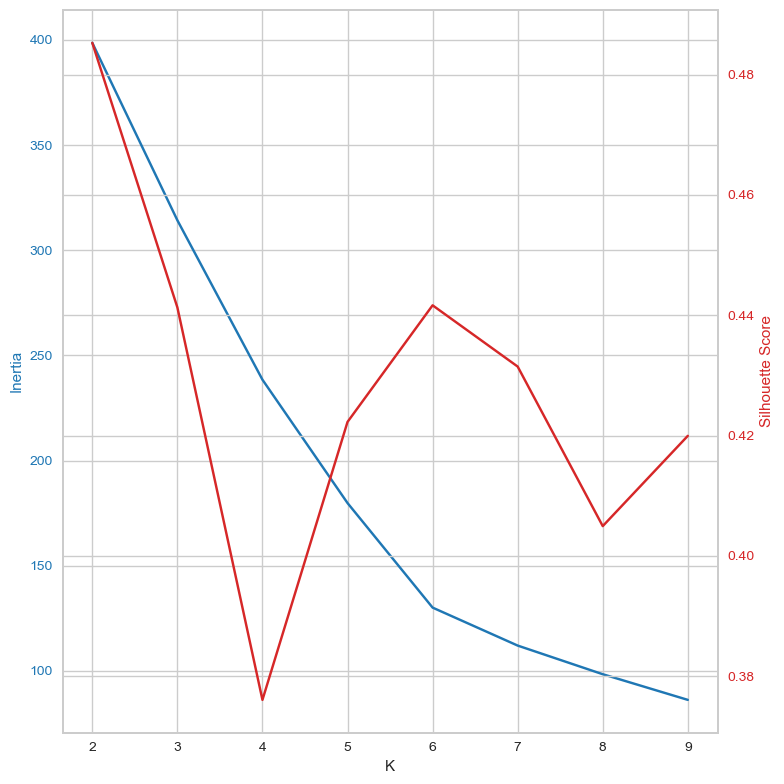

In [324]:
fig, ax1 = plt.subplots(figsize=(8,8))

color = 'tab:blue'
ax1.set_xlabel('K')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(K, Sum_of_squared_distances, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:red'
ax2.set_ylabel('Silhouette Score', color=color)  
ax2.plot(K, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
## analyse ##333 and see if clustering is proper

In [ ]:
card['cluster_id'] = kmeans.labels_

In [ ]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=card, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

In [ ]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=card, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

In [315]:
# DBSCAN

In [404]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_scaled) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_scaled)

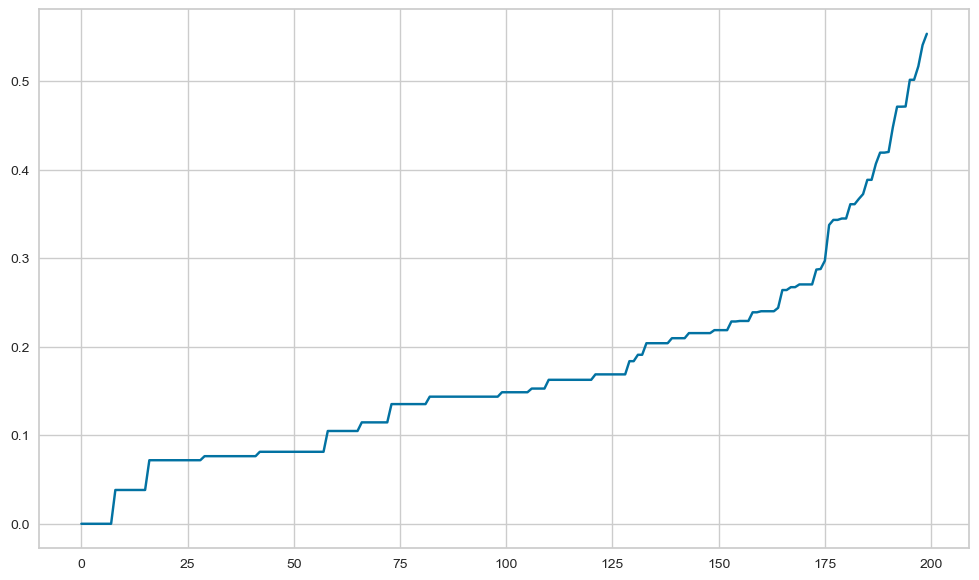

In [405]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (12,7) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [407]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 5000, min_samples = 4).fit(X_scaled) # fitting the model
labels = dbscan.labels_ # getting the labels

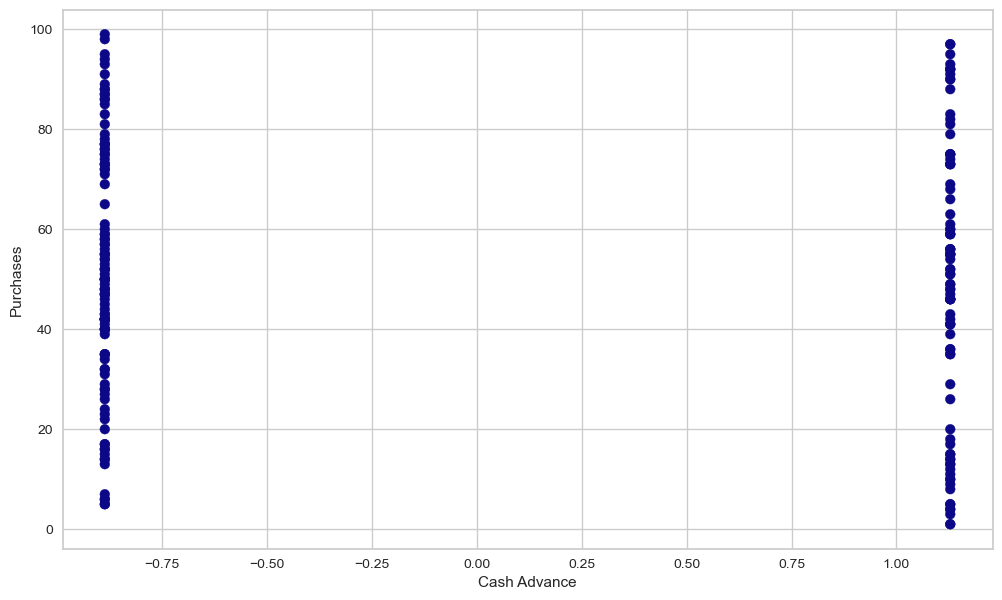

In [408]:
# Plot the clusters
plt.figure(figsize=(12,7))
plt.scatter(x=X_scaled[:,3],y=y, c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Cash Advance") # X-axis label
plt.ylabel("Purchases") # Y-axis label
plt.show() # showing the plot

In [ ]:
## not clustering properly

In [409]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=25)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

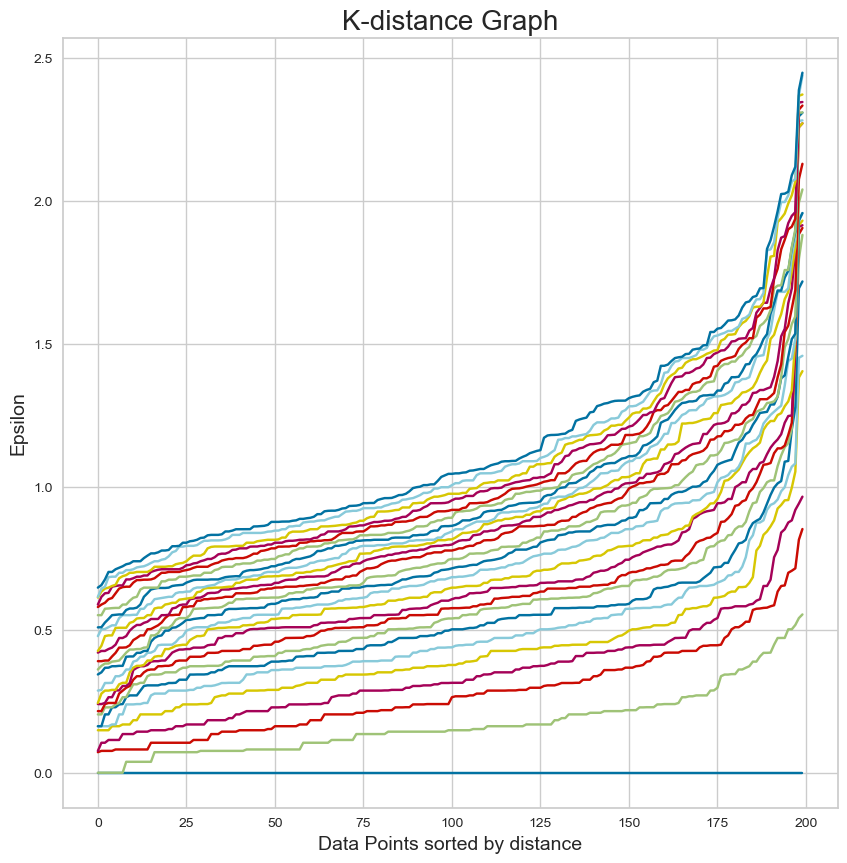

In [410]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
# distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()